## Step 1: Setup

Install music21 and tools for audio playback (FluidSynth) and notation (MuseScore, optional). This step may take a few minutes to run.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install music21
!apt install fluidsynth -y
!pip install pyfluidsynth
# Optional for notation display:
!apt-get update -qq -y
!apt-get install musescore3 xvfb -y
!Xvfb :99 -screen 0 1024x768x24 &
import os
os.environ['DISPLAY'] = ':99'
from music21 import environment
e = environment.Environment()
e['musescoreDirectPNGPath'] = '/usr/bin/musescore3'
e['pdfPath'] = '/usr/bin/musescore3'
e['graphicsPath'] = '/usr/bin/musescore3'
e['musicxmlPath'] = '/usr/bin/musescore3'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fluidsynth is already the newest version (2.2.5-1).
0 upgraded, 0 newly installed, 0 to remove and 58 not upgraded.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
musescore3 is already the newest version (3.2.3+dfsg2-11).
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.16).
0 upgraded, 0 newly installed, 0 to remove and 58 not upgraded.


##Step 2: Create, Manipulate, and Analyze a Chord

This code creates a C minor triad, sets its duration, checks if it's a minor triad, gets its common name, and plays it back. Edit the `pitches` list to try different chords (e.g., ["C4", "E4", "G4"] for C major)!

Editing Tips: Change pitch names (e.g., add sharps/flats like 'F#4' or 'B-4'). Try creating a major triad or seventh chord. Use `cMinor.remove("E-4")` to remove pitches. Experiment with inversions by reordering pitches (e.g., ["E-4", "G4", "C5"] for first inversion).

Is minor triad: False
Common name: minor seventh chord
Inversion: 0
Interval vector: [0, 1, 2, 1, 2, 0]


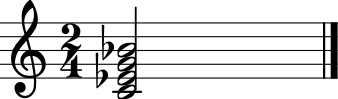

FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'temp.wav'..


In [ ]:
from music21 import *
from IPython.display import Audio

# Create a chord from pitch names (edit here!)
cMinor = chord.Chord(["C4", "E-4", "G4"])

# Set duration
cMinor.duration.type = 'half'  # 2 quarter lengths

# Manipulate: Add a pitch and reposition for display
cMinor.add("B-5")  # Make it a minor seventh chord
cMinor.closedPosition(inPlace=True)  # Stack pitches closely

# Analyze
is_minor_triad = cMinor.isMinorTriad()  # True/False
common_name = cMinor.commonName  # e.g., 'minor triad'
inversion = cMinor.inversion()  # 0 for root position
interval_vector = cMinor.intervalVector  # Post-tonal analysis

# Print analysis (run to see results)
print(f"Is minor triad: {is_minor_triad}")
print(f"Common name: {common_name}")
print(f"Inversion: {inversion}")
print(f"Interval vector: {interval_vector}")

# Optional: Display notation (requires MuseScore setup)
cMinor.show()

# Export to MIDI and render to WAV for playback
cMinor.write('midi', fp='temp.mid')
!fluidsynth -ni /usr/share/sounds/sf2/FluidR3_GM.sf2 temp.mid -F temp.wav -r 44100

# Play the audio
Audio('temp.wav')


##Step 3: Create a Chord Progression in a Stream

Now, let's build a simple chord progression (e.g., I-IV-V-I in C major) by creating multiple chords and adding them to a Music21 Stream. A Stream is a container for musical elements in sequence. Edit the chords or durations to customize the progression!

This code also inserts a key signature for contextual analysis in the next step.

Editing Tips: Add more chords (e.g., for ii-V-I jazz progression). Vary durations (e.g., `ch.duration.quarterLength = 1.0` for quarter notes). Insert tempo with `progression_stream.insert(0, tempo.MetronomeMark(number=120))`.

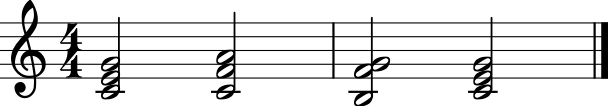

FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'progression.wav'..


In [ ]:
from music21 import *

# Create a Stream
progression_stream = stream.Stream()

# Define a key (for roman numeral analysis later)
key_sig = key.Key('C')  # C major
progression_stream.insert(0, key_sig)

# Create chords for the progression (edit here!)
chords = [
    chord.Chord(["C4", "E4", "G4"]),  # I (C major)
    chord.Chord(["C4", "F4", "A4"]),  # IV (F major)
    chord.Chord(["B3", "F4", "G4"]),  # V (G major)
    chord.Chord(["C4", "E4", "G4"])   # I (C major)
]

# Add chords to the Stream with durations
for ch in chords:
    ch.duration.quarterLength = 2.0  # Half note each; edit individually if needed
    progression_stream.append(ch)

# Optional: Display the full progression notation (requires MuseScore setup)
progression_stream.show()

# Playback the progression
progression_stream.write('midi', fp='progression.mid')
!fluidsynth -ni /usr/share/sounds/sf2/FluidR3_GM.sf2 progression.mid -F progression.wav -r 44100
Audio('progression.wav')

## Step 4: Analyze the Chord Progression Stream

With the progression in a Stream, we can analyze each chord in context (e.g., roman numerals relative to the key). This code iterates through the chords, analyzes them, and prints results like roman figures and inversions.

Analysis Tips: Roman numerals show function (e.g., 'I' for tonic). For minor keys, use `key.Key('c')` (lowercase for minor). Add post-tonal analysis with `element.intervalVector`.

In [ ]:
# Assuming 'progression_stream' from Step 3

# Analyze each chord in the stream
for element in progression_stream.getElementsByClass('Chord'):
    # Get roman numeral (requires key context)
    rn = roman.romanNumeralFromChord(element, progression_stream.keySignature)

    # Other analyses
    common_name = element.commonName
    inversion = element.inversion()

    # Print results
    print(f"Chord at offset {element.offset}: Pitches = {element.pitches}")
    print(f"Roman Numeral: {rn.figure}")
    print(f"Common Name: {common_name}")
    print(f"Inversion: {inversion}")
    print("---")

Chord at offset 0.0: Pitches = (<music21.pitch.Pitch C4>, <music21.pitch.Pitch E4>, <music21.pitch.Pitch G4>)
Roman Numeral: I
Common Name: major triad
Inversion: 0
---
Chord at offset 2.0: Pitches = (<music21.pitch.Pitch C4>, <music21.pitch.Pitch F4>, <music21.pitch.Pitch A4>)
Roman Numeral: IV64
Common Name: major triad
Inversion: 2
---
Chord at offset 4.0: Pitches = (<music21.pitch.Pitch B3>, <music21.pitch.Pitch F4>, <music21.pitch.Pitch G4>)
Roman Numeral: V65
Common Name: incomplete dominant-seventh chord
Inversion: 1
---
Chord at offset 6.0: Pitches = (<music21.pitch.Pitch C4>, <music21.pitch.Pitch E4>, <music21.pitch.Pitch G4>)
Roman Numeral: I
Common Name: major triad
Inversion: 0
---


## Step 5: Store the Analysis as a DataFrame

To organize and further analyze the results, store the chord data in a Pandas DataFrame. This code collects analysis info (e.g., offset, pitches, roman numeral, common name) into a DataFrame and displays it. You can then perform operations like filtering or exporting to CSV.

After running the following code cell, look in the folder on left of your screen for the file `chord_analysis.csv`. This is dataframe outputed as a CSV.

This builds on the analysis from Step 4.

In [ ]:
import pandas as pd
from music21 import *

# Assuming 'progression_stream' from Step 3

# Collect analysis data
data = []
for element in progression_stream.getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(element, progression_stream.keySignature)
    pitches = [p.nameWithOctave for p in element.pitches]
    data.append({
        'Offset': element.offset,
        'Duration': element.duration.quarterLength,
        'Pitches': ', '.join(pitches),
        'Roman Numeral': rn.figure,
        'Common Name': element.commonName,
        'Inversion': element.inversion(),
        'Is Major Triad': element.isMajorTriad()
    })

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print("Chord Analysis DataFrame:")
print(df)

# Optional: Basic Pandas operations (e.g., filter major triads)
major_triads = df[df['Is Major Triad'] == True]
print("\\nMajor Triads:")
print(major_triads)

# Export to CSV
df.to_csv('chord_analysis.csv', index=False)

Chord Analysis DataFrame:
   Offset  Duration     Pitches Roman Numeral  \
0     0.0       2.0  C4, E4, G4             I   
1     2.0       2.0  C4, F4, A4          IV64   
2     4.0       2.0  B3, F4, G4           V65   
3     6.0       2.0  C4, E4, G4             I   

                         Common Name  Inversion  Is Major Triad  
0                        major triad          0            True  
1                        major triad          2            True  
2  incomplete dominant-seventh chord          1           False  
3                        major triad          0            True  
\nMajor Triads:
   Offset  Duration     Pitches Roman Numeral  Common Name  Inversion  \
0     0.0       2.0  C4, E4, G4             I  major triad          0   
1     2.0       2.0  C4, F4, A4          IV64  major triad          2   
3     6.0       2.0  C4, E4, G4             I  major triad          0   

   Is Major Triad  
0            True  
1            True  
3            True  
